The purpose of this section is to preprocess tabular data for GCBM.Carpathians. The output `Growth_Curves.csv` is available in the `output` directory.

# 0. Imports

Import required modules.

In [1]:
# data mainpulation 
import numpy as np
import pandas as pd

# plots and graphs
import matplotlib.pyplot as plt

# function fit
from scipy.optimize import curve_fit

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# save output
import os
import csv

# 1. Data Source

Finding data from the literature can be time consuming. Here are some tips how to find and extract data for the GCBM simulation:

**Literature search:**

Perform a literature search in Google Scholar or ISI web of Science using combination of keywords including:
- AGB increment forest
- stand growth curve forest
- stand dynamics forest
- merchantable volume forest
- biomass dynamics forest

You might also need to include keywords that describe your forest (e.g. temperate, tropical, boreal).

**Data extraction:**

Open a paper and extract AGB biomass data across time from data tables or graphs.
Interesting parameters are:
- Above ground biomass (ABG; often in tonnes per hectare)
- Above ground biomass to below ground biomass ratio (AGB:BGB) 
- Species or group
- Age
- Forest condition (e.g. primary or secondary forest)

You can use [WebPlotDigitizer - Extract data from plots, images, and maps](https://automeris.io/WebPlotDigitizer/) to automatically extract data from graphs and figures.

Data for Carpathian montane forests was extracted from the following article:

Zielonka A, Drewnik M, Musielok Ł, Dyderski MK, Struzik D, Smułek G, Ostapowicz K. Biotic and Abiotic Determinants of Soil Organic Matter Stock and Fine Root Biomass in Mountain Area Temperate Forests—Examples from Cambisols under European Beech, Norway Spruce, and Silver Fir (Carpathians, Central Europe). Forests. 2021; 12(7):823. https://doi.org/10.3390/f12070823 

# 2. Chapman-Richards Growth Function

The Chapman-Richards growth function has been a popular model for describing the growth of various tree and forest stand growth variables, e.g. tree and stand height, diameter at breast height, basal area and volume. As such it has been and is still widely used in many empirical forest growth simulators, particularly where the accuracy of model prediction is crucial. 

In [2]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

# 3. Curve Fitting

In order to get the growth curves, we will fit the Chapman-Richards growth function in the data extracted from the literature using `scipy.optimize.curve_fit()`.

[scipy.optimize.curve_fit()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function uses non-linear least squares to fit a function, f, to data.

## 3.1 Norway Spruce

Save data from the literature as `numpy arrays`:

In [3]:
# age
x_data_ns = np.array([14, 18, 28, 43, 43, 43, 99, 99, 99, 105, 114, 119])
# AGB
y_data_ns = np.array([20.99, 31.95, 20.73, 111.71, 112.91, 45.71, 296.97, 104.5, 162.8, 155.73, 199.07, 224.54])

Fit the growth curve function and get parameters:

In [4]:
params_ns, _ = curve_fit(growth_curve, x_data_ns, y_data_ns, [100, 1, 1])
params_ns

array([2.61126612e+02, 1.74074170e-02, 1.78619818e+00])

Visualize the growth curve:

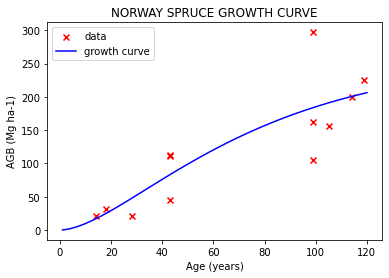

In [5]:
plt.scatter(x_data_ns, y_data_ns, label='data', marker='x', c='r')
x = np.linspace(1, 120, 120)
plt.plot(x, growth_curve(x, *params_ns), 'b-', label='growth curve')

plt.title('NORWAY SPRUCE GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

## 3.2 European Beech

Save data from the literature as `numpy arrays`:

In [6]:
# age
x_data_eb = np.array([30, 40, 55, 55, 60, 60, 85, 85])
# AGB
y_data_eb = np.array([52.36, 444.5, 130.59, 138.53, 199.45, 38.01, 337.35, 440.36])

Fit the growth curve function and get parameters:

In [7]:
params_eb, _ = curve_fit(growth_curve, x_data_eb, y_data_eb, [300, 2.7, 2])
params_eb

array([222.64375,   2.7    ,   2.     ])

Visualize the growth curve:

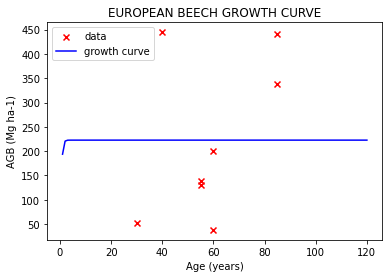

In [8]:
plt.scatter(x_data_eb, y_data_eb, label='data', marker='x', c='r')
x = np.linspace(1, 120, 120)
plt.plot(x, growth_curve(x, *params_eb), 'b-', label='growth curve')

plt.title('EUROPEAN BEECH GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

The data for European Beech is not appropriate for curve fitting. Thus, this model can't be considered for the GCBM simulation.

## 3.3 Silver Fir

Save data from the literature as `numpy arrays`:

In [9]:
# age
x_data_sf = np.array([33, 45, 60, 60, 75, 85, 91, 115])
# AGB
y_data_sf = np.array([26.02, 108.27, 61.76, 92.54, 246.98, 142.86, 317.32, 226.9])

Fit the growth curve function and get parameters:

In [10]:
params_sf, _ = curve_fit(growth_curve, x_data_sf, y_data_sf, [250, 0.3, 1])
params_sf

array([2.85665063e+02, 3.96465469e-02, 8.52847805e+00])

Visualize the growth curve:

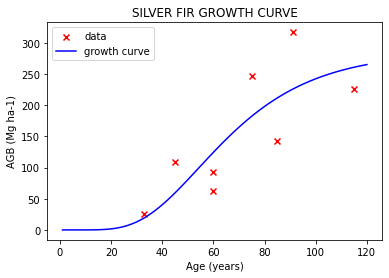

In [11]:
plt.scatter(x_data_sf, y_data_sf, label='data', marker='x', c='r')
x = np.linspace(1, 120, 120)
plt.plot(x, growth_curve(x, *params_sf), 'b-', label='growth curve')

plt.title('SILVER FIR GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

# 4. Make csv file

For now, only Norway Spruce growth curve will be used. Save it as a csv file.

Note: Check if the selected `species` can be used for the simulation from `GCBM.Carpathians/Standalone_GCBM/documentation/species_names.csv`([link](https://github.com/moja-global/GCBM.Carpathians/blob/main/Standalone_GCBM/documentation/species_names.csv))

In [12]:
agb_values = [growth_curve(age, *params_ns) for age in range(201)]
header     = ['LifeZone', 'AIDBSPP'] + list(range(201))
life_zones = ['Boreal wet forest', 'Cool temperate moist forest', 'Cool temperate steppe', 
              'Cool temperate wet forest', 'Polar rain tundra']
species    = 'Norway spruce'

In [13]:
if not os.path.exists('output'):
    os.makedirs('output')

with open(os.path.join('output', 'Growth_Curves.csv'), 'w') as gc_file:
    gc_writer = csv.writer(gc_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    gc_writer.writerow(header)
    for life_zone in life_zones:
        gc_writer.writerow([life_zone] + [species] + agb_values)

Check the final result:

In [14]:
data = pd.read_csv(os.path.join('output', 'Growth_Curves.csv'))
print(data)

                      LifeZone        AIDBSPP    0        1         2  \
0            Boreal wet forest  Norway spruce  0.0  0.18523  0.629055   
1  Cool temperate moist forest  Norway spruce  0.0  0.18523  0.629055   
2        Cool temperate steppe  Norway spruce  0.0  0.18523  0.629055   
3    Cool temperate wet forest  Norway spruce  0.0  0.18523  0.629055   
4            Polar rain tundra  Norway spruce  0.0  0.18523  0.629055   

          3         4         5         6         7  ...         191  \
0  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   
1  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   
2  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   
3  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   
4  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   

          192         193         194         195        196         197  \
0  244.864499  245.141223  245.413306  245.680824  2